## Selected Socioeconomic Indicators in Chicago

<p>The city of Chicago released a dataset of socioeconomic data to the Chicago City Portal.</p>
<p>This dataset contains a selection of six socioeconomic indicators of public health significance and a "hardship index", for each Chicago community area, for the years 2008 – 2012.</p>
<p>Scores on the hardship index can range from 1 to 100, with a higher index number representing a greater level of hardship.</p>
<p>A detailed description of the dataset can be found on <a href="https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2/about_data">the city of Chicago's website</a>, but to summarize, the dataset has the following variables:</p>
<ul>
    <li><b>Community Area Number</b>(<code>ca</code>): Used to uniquely identify each row of the dataset.</li>
    <li><b>Community Area Name</b>(<code>community_area_name</code>): The name of the region in the city of Chicago.</li>
    <li><b>Percent of Housing Crowded</b>(<code>percent_of_housing_crowded</code>): Percent of occupied housing units with more than one person per room.</li>
    <li><b>Percent Households Below Poverty</b>(<code>percent_households_below_poverty</code>): Percent of households living below the federal poverty line.</li>
    <li><b>Percent Aged 16+ Unemployed</b>(<code>percent_aged_16_unemployed</code>): Percent of persons over the age of 16 years that are unemployed.</li>
    <li><b>Percent Aged 25+ without High School Diploma</b>(<code>percent_aged_25_without_high_school_diploma</code>): Percent of persons over the age of 25 years without a high school education.</li>
    <li><b>Percent Aged Under 18 or Over 64</b>(<code>percent_aged_under_18_or_over_64</code>): Percent of population under 18 or over 64 years of age. (i.e. dependents)</li>
    <li><b>Per Capita Income</b>(<code>per_capita_income_</code>): Community Area per capita income is estimated as the sum of tract-level aggregate incomes divided by the total population.</li>
    <li><b>Hardship Index</b>(<code>hardship_index</code>): Score that incorporates each of the six selected socioeconomic indicators.</li>
</ul>
<p>In this Lab, we'll take a look at the variables in the socioeconomic indicators dataset and do some basic analysis with Python.</p>

## Connect to the database

In [1]:
import seaborn as sns
import sqlite3
import os

dir_path = os.path.join(".", "data")
db_name = os.path.join(dir_path, "socioeconomic.db")

In [2]:
con = sqlite3.connect(db_name)
cur = con.cursor()

## Store the dataset in a Table

<p>In many cases the dataset to be analyzed is available as a .CSV (comma separated values) file, perhaps on the internet. To analyze the data using SQL, it first needs to be stored in the database.</p>
<p>We will first read the csv files from the given url into pandas dataframes.</p>
<p>Next we will be using the <code>df.to_sql()</code> function to convert each csv file to a table in sqlite with the csv data loaded in it.</p>

In [3]:
import pandas as pd

In [4]:
url = "https://data.cityofchicago.org/resource/jcxq-k9xf.csv"
df = pd.read_csv(url)
df.to_sql("chicago_socioeconomic_data", con=con, if_exists="replace", index=False, method="multi")

78

<p>You can verify that the table creation was successful by making a query like:</p>

In [5]:
cur.execute("SELECT * FROM chicago_socioeconomic_data LIMIT 5;")
cur.fetchall()

[(1.0, 'Rogers Park', 7.7, 23.6, 8.7, 18.2, 27.5, 23939, 39.0),
 (2.0, 'West Ridge', 7.8, 17.2, 8.8, 20.8, 38.5, 23040, 46.0),
 (3.0, 'Uptown', 3.8, 24.0, 8.9, 11.8, 22.2, 35787, 20.0),
 (4.0, 'Lincoln Square', 3.4, 10.9, 8.2, 13.4, 25.5, 37524, 17.0),
 (5.0, 'North Center', 0.3, 7.5, 5.2, 4.5, 26.2, 57123, 6.0)]

## Problems

<p><b>Problem 1</b> How many rows are in the dataset?</p>

In [6]:
cur.execute("SELECT COUNT(*) FROM chicago_socioeconomic_data;")
cur.fetchall()[0][0]

78

<p><b>Problem 2</b> How many community areas in Chicago have a hardship index greater than 50.0?</p>

In [7]:
cur.execute("SELECT COUNT(*) FROM chicago_socioeconomic_data WHERE hardship_index > 50.0;")
cur.fetchall()[0][0]

38

<p><b>Problem 3</b> What is the maximum value of hardship index in this dataset?</p>

In [8]:
cur.execute("SELECT MAX(hardship_index) FROM chicago_socioeconomic_data;")
cur.fetchall()[0][0]

98.0

<p><b>Problem 4</b> Which community area has the highest hardship index?</p>

In [9]:
statement = """
SELECT community_area_name
FROM chicago_socioeconomic_data
WHERE hardship_index = (
    SELECT MAX(hardship_index) FROM chicago_socioeconomic_data
);
"""
cur.execute(statement)
cur.fetchall()[0][0]

'Riverdale'

<p><b>Problem 5</b> Which Chicago community areas have per-capita incomes greater than $60,000?</p>

In [10]:
cur.execute("SELECT community_area_name FROM chicago_socioeconomic_data WHERE per_capita_income_ > 60000;")

for row in cur.fetchall():
    for name in row:
        print(name)

Lake View
Lincoln Park
Near North Side
Loop


<p><b>Problem 6</b> Create a scatter plot using the variables <code>per_capita_income_</code> and <code>hardship_index</code>. Explain the correlation between the two variables.</p>

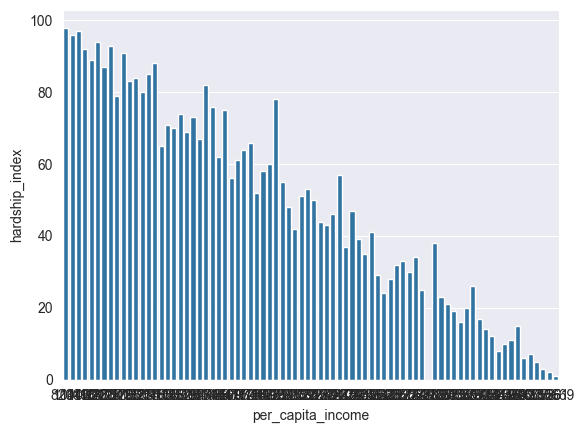

In [11]:
cur.execute("SELECT per_capita_income_, hardship_index FROM chicago_socioeconomic_data;")

columns = ["per_capita_income", "hardship_index"]

income_vs_hardship = pd.DataFrame(cur.fetchall(), columns=columns)
plot = sns.barplot(x=columns[0], y=columns[1], data=income_vs_hardship)

In [12]:
con.close()

****
This is the end of the file.
****